# Implement perceptron

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set('poster')
sns.set_style('whitegrid')

plt.style.use = 'default'
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

from matplotlib.colors import ListedColormap

In [15]:
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features
        y: array-like, shape = [n_samples]
            Target values
            
        Returns
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1]) # initial weights: all zeros
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                
                # weight change = learning rate (eta) * error (target - predcited) * input
                # new weight += weight change 
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi
                self.w_[0] += update # for convenience we set the x1 = 1
                errors += int(update != 0.0) # this means it's going to be always 0 or 1?
            self.errors_.append(errors)
        return self
                
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # if it's true, return 1, else, return -1

# Perceptron on the Iris dataset

In [29]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [126]:
X = df.iloc[:100, [0, 2]].values # for now, use only two features (sepal length and petal length)

y = df.iloc[:100,4].values # first 100 rows
y = np.where(y == 'Iris-setosa', -1, 1) # if Iris-setosa then -1, else 1

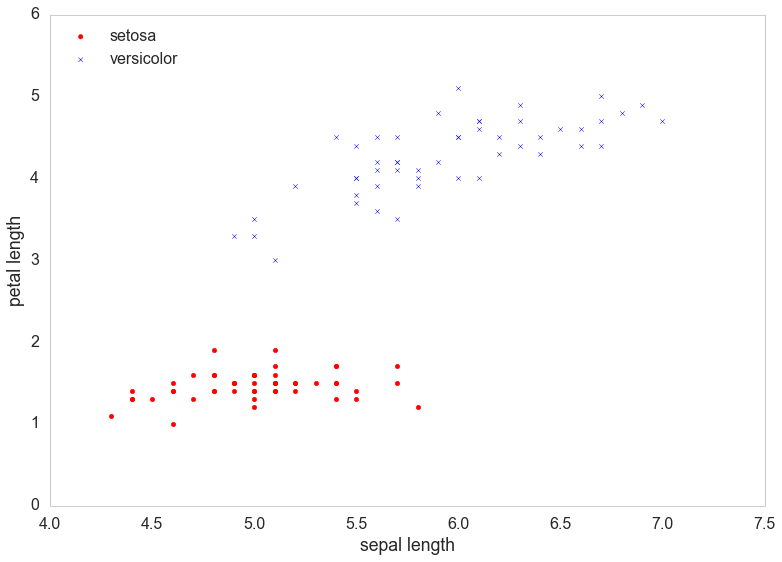

In [127]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

## Training

In [128]:
ppn = Perceptron(eta = 0.1, n_iter=10)

In [129]:
ppn.fit(X,y)

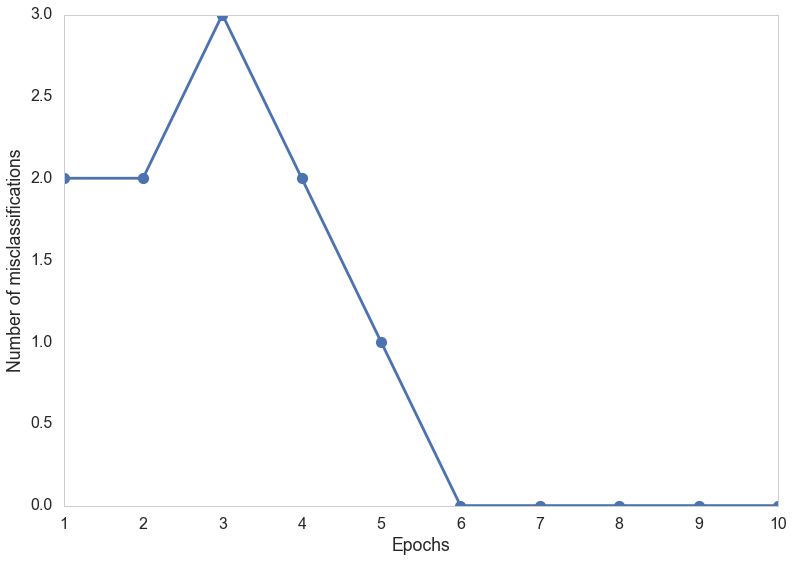

In [130]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Visualize decision boundary

In [62]:
# setup marker generator and color map
markers = ('s','x','o','^','v')
colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

In [72]:
x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1

print(x1_min, x1_max)
print(x2_min, x2_max)

3.3 8.0
0.0 6.1


In [77]:
resolution = .02
print(np.arange(x1_min, x1_max, resolution).shape) 
print(np.arange(x2_min, x2_max, resolution).shape)

(235,)
(305,)


In [94]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                      np.arange(x2_min, x2_max, resolution))

In [97]:
xx1.shape, xx2.shape

((305, 235), (305, 235))

In [98]:
xx1

array([[ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98]])

In [99]:
xx2

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.02,  0.02,  0.02, ...,  0.02,  0.02,  0.02],
       [ 0.04,  0.04,  0.04, ...,  0.04,  0.04,  0.04],
       ..., 
       [ 6.04,  6.04,  6.04, ...,  6.04,  6.04,  6.04],
       [ 6.06,  6.06,  6.06, ...,  6.06,  6.06,  6.06],
       [ 6.08,  6.08,  6.08, ...,  6.08,  6.08,  6.08]])

In [104]:
xx2.ravel()

array([ 0.  ,  0.  ,  0.  , ...,  6.08,  6.08,  6.08])

In [106]:
np.array([xx1.ravel(), xx2.ravel()]).T

array([[ 3.3 ,  0.  ],
       [ 3.32,  0.  ],
       [ 3.34,  0.  ],
       ..., 
       [ 7.94,  6.08],
       [ 7.96,  6.08],
       [ 7.98,  6.08]])

In [117]:
classifier = ppn
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [118]:
Z.shape

(71675,)

In [119]:
Z = Z.reshape(xx1.shape)
Z.shape

(305, 235)

(0.0, 6.0800000000000001)

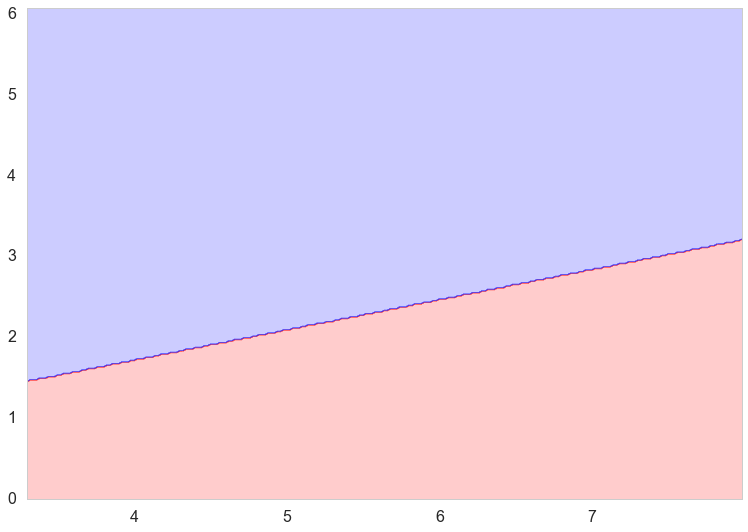

In [121]:
plt.contourf(xx1, xx2, Z, alpha=.2, cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

In [139]:
def plot_decision_regions(X, y, classifier, resolution = .01):
    
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1 # get min and max for each feature
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    # we want to just create a very fine scatter plot for each grid point
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # np.arange(min,max,bin): similar to linspace
                          np.arange(x2_min, x2_max, resolution)) # create a mesh grid (shape: len(xx1), len(xx2))
    
    # prediction for each grid point
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=.2, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples (actual data)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], 
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

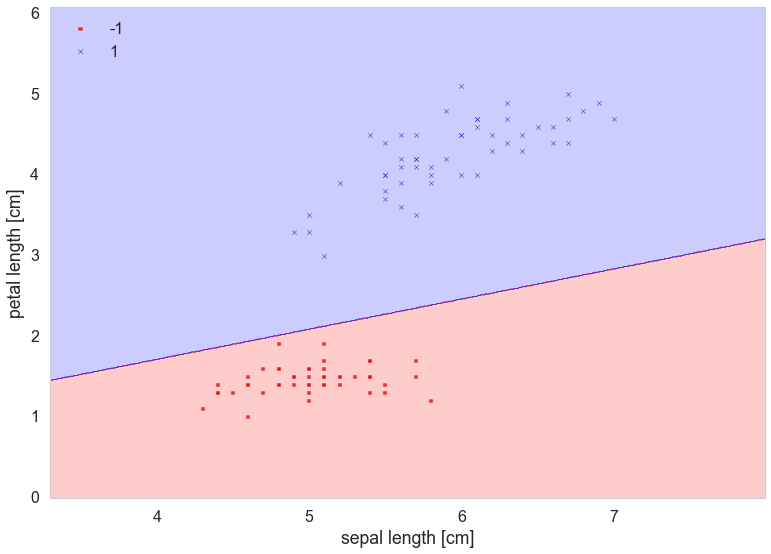

In [140]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Implement adaptive linear neurons (Adaline)

- Similar to perceptron but the major difference is that activation function is identity function.
- But then how does this work as a classifier? At the end, Adaline has a "Quantizer" which is a unit step function.

- Also it has a continuous error function: sum of square errors (SSE).
- We use gradient descent to minimize this cost function.

- unlike perceptron, the weight is updated based on all samples. so it's **batch** gradient descent.

In [141]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    
    """
    
    def __init__(self, eta=.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1]) # consider x_0 and w_0
        self.cost_ = [] # initialize
        
        # in perceptron, we have two for loops. one for n_iter and the other for training set
        # here, we only have one for loop because it's a batch. 
        # that's why can use np.dot (vector multiplication) because we're processing the batch at once
        for i in range(self.n_iter): 
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) # updating weights
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 # SSE
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

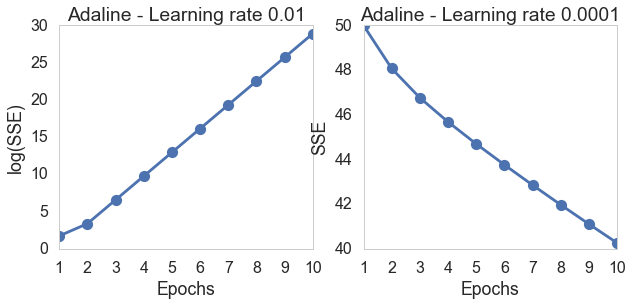

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

both have problems
- left: overshooting (learning rate is too large)
- right: learning too slow (rate is too small)

# Scaling
- gradient descent can be benefited by feature scaling.
- here, we try standardization.

In [152]:
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean()) / X[:,1].std()

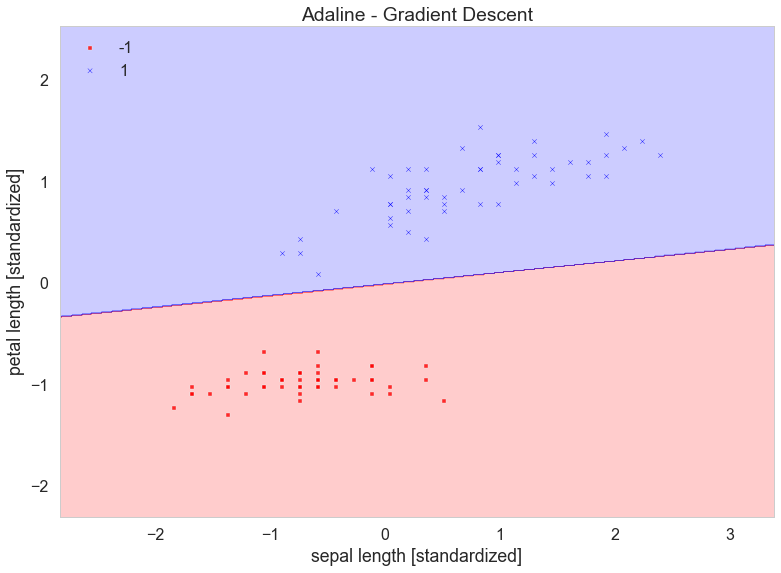

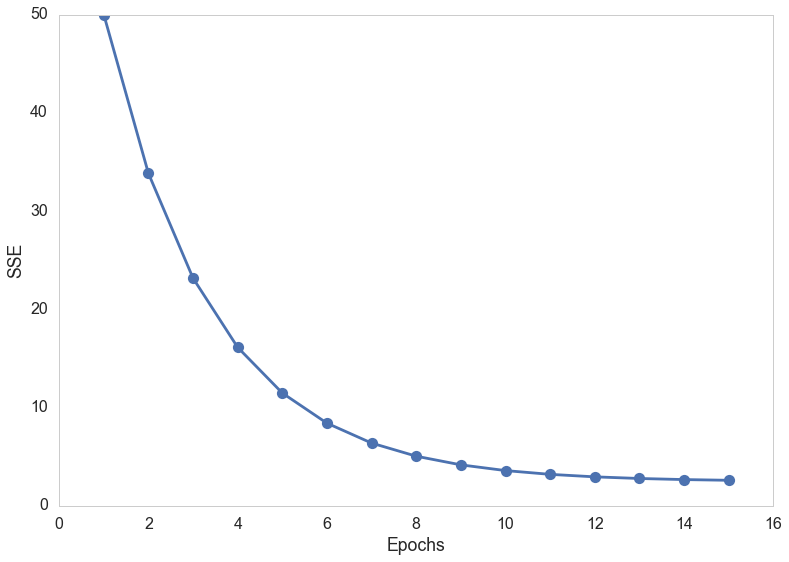

In [156]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.show()

# Large scale ML & stochastic gradient descent (SGD)
- Batch approach
    - not uncommon but costly: if we want to reevaluate the whole training set each time we take one step forward to the minimum
- Alternative: SGD (= *on-line* gradient descent)
    - Instead of updating weights based on the sum of the erros of all samples, update the weights incrementally for each training sample
    - Reaches convergence much faster because weights are updated more frequently
    - error surface is noisier than in gradient descent -> advantage that SGD can escape shallow local minima more
    - **need to present data in a random order to prevent cycles** -> need to shuffle the training set
- learning rate for SGD
    - **adaptive learning rate**: decrese over time: ex. c1 / (n_iter + c2) where c1 and c2 are constants
- SGD allows online learning
    - ex. customer data for web application (new data arrives)
    - once the model is updated, we can discard training data

# Implement SGD
- compared to Adaline, we will implement this in `fit` method
- `partial_fit` method: do not reinitialize the weights for online learning
- add option to `shuffle` the training data befoe each epoch

**naming convention**
http://visualgit.readthedocs.io/en/latest/pages/naming_convention.html
- private variable name starts with underscore

In [292]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool
        Shuffles training data every epoch
        if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling
        and initializing the weights.
    
    """
    
    def __init__(self, eta=.01, n_iter=50,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)        
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        
        """
        
        self._initialize_weights(X.shape[1]) # initialize weights to zeros (w_ becomes all zero, same as adaline)
        self.cost_ = [] # initialize 

        for i in range(self.n_iter): 
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target)) # adaline learning rule (update each sample)
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
        
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights""" # for online learning
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        if y.ravel().shape[0] > 1: # more than one target?
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y) # one new data point is added
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

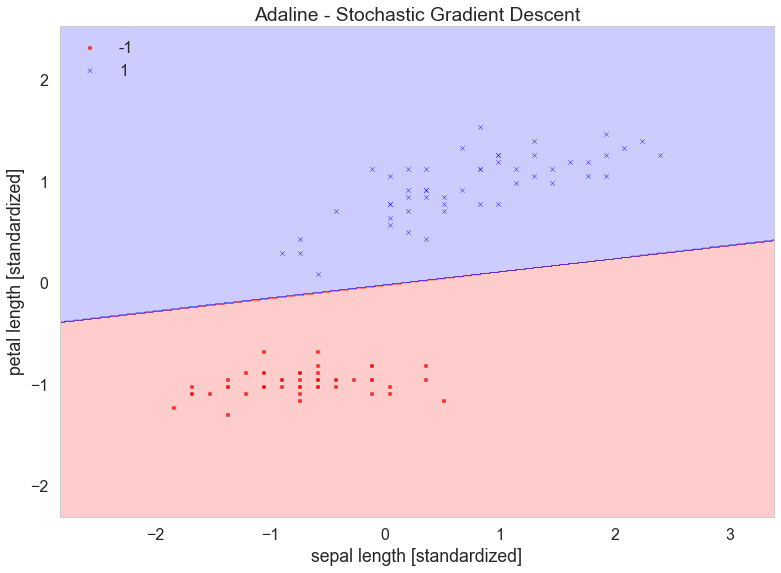

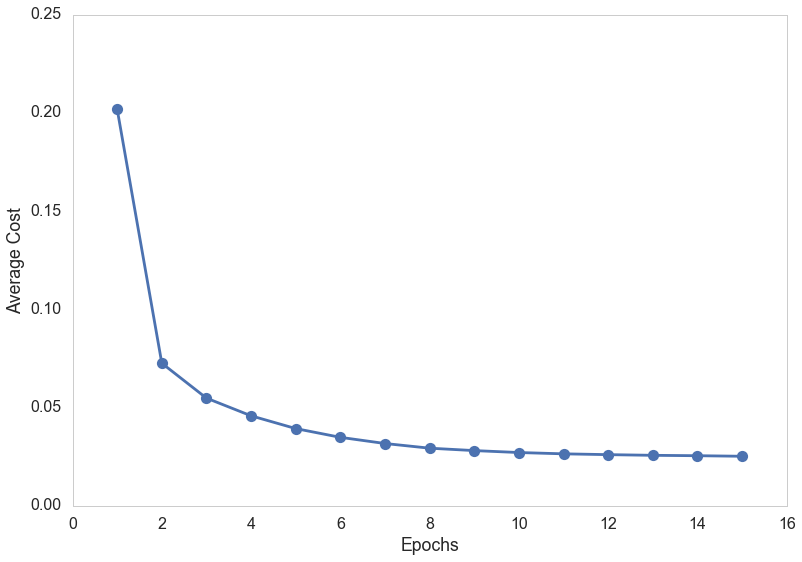

In [168]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [274]:
def plot_decision_regions__(X, y, i, classifier, resolution = .01):
    
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1 # get min and max for each feature
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    # we want to just create a very fine scatter plot for each grid point
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # np.arange(min,max,bin): similar to linspace
                          np.arange(x2_min, x2_max, resolution)) # create a mesh grid (shape: len(xx1), len(xx2))
    
    # prediction for each grid point
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=.02, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples (actual data)
    plt.scatter(X[:i,0],X[:i,1],marker='^')
#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], 
#                     alpha=0.8, c=cmap(idx),
#                     marker=markers[idx], label=cl)

In [393]:
np.random.seed(0)
r = np.random.permutation(len(y))
X_rand, y_rand = X_std[r], y[r]

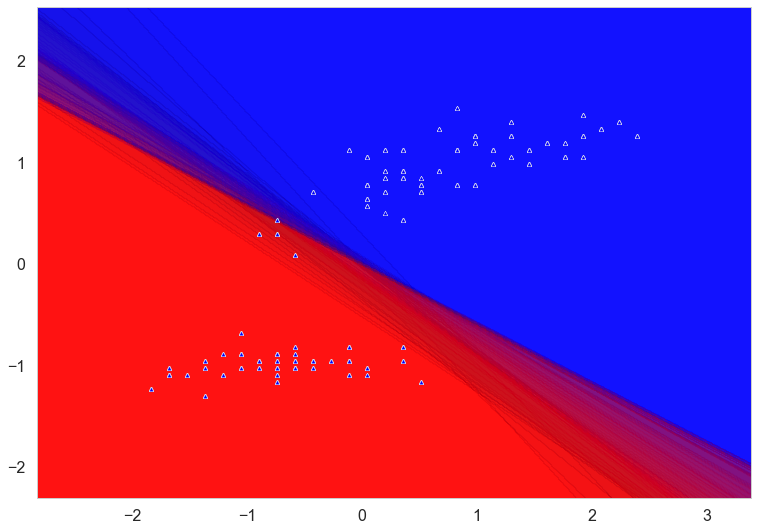

In [396]:
for i in np.arange(2,100):
    ada = AdalineSGD(n_iter=15,eta=0.01, random_state=1)
    ada.partial_fit(X_rand[:i,:], y_rand[:i])
    plot_decision_regions__(X_rand, y_rand, i, classifier=ada)

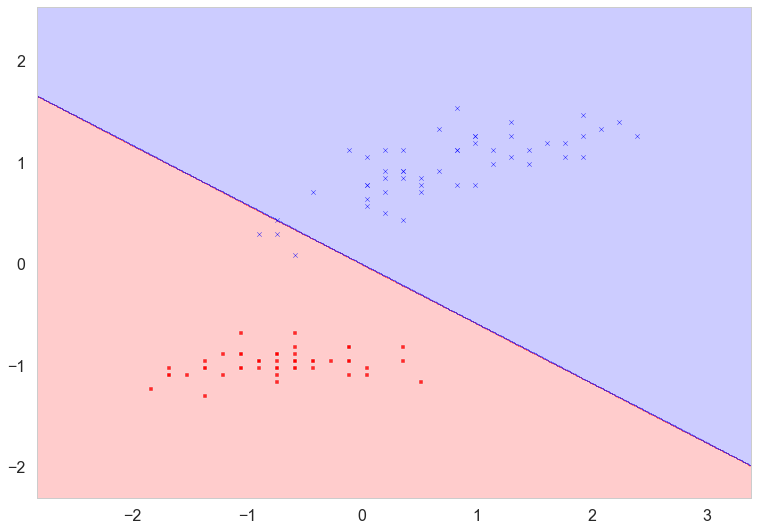

In [397]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.partial_fit(X_rand[:100,:], y_rand[:100])
plot_decision_regions(X_rand, y_rand, classifier=ada)

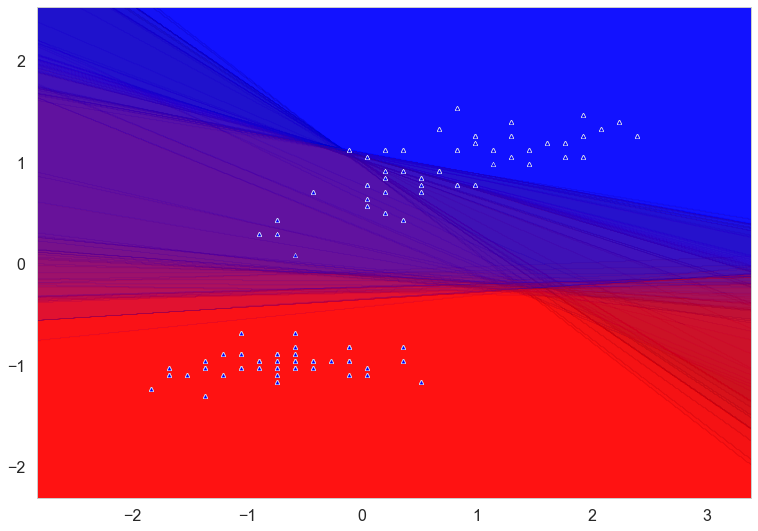

In [352]:
for i in np.arange(2,100):
    ada = AdalineSGD(n_iter=15,eta=0.1, random_state=1)
    ada.partial_fit(X_std[:i,:], y[:i])
    plot_decision_regions__(X_std, y, i, classifier=ada)

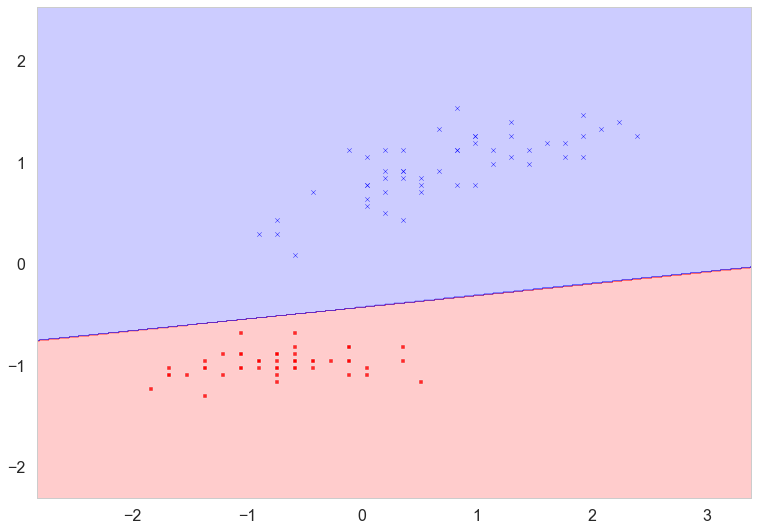

In [353]:
ada = AdalineSGD(n_iter=15,eta=0.1, random_state=1)
ada.partial_fit(X_std[:100,:], y[:100])
plot_decision_regions(X_std, y, classifier=ada)

## eta = 0.1

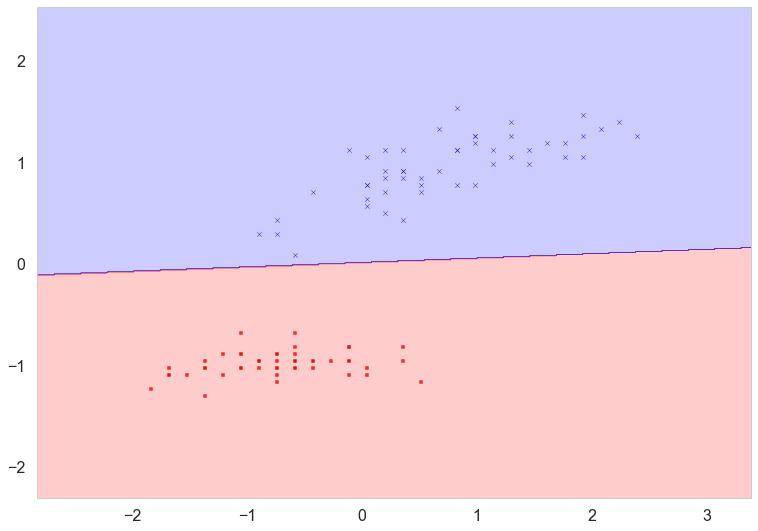

In [398]:
ada = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada.partial_fit(X_rand[:100,:], y_rand[:100])
plot_decision_regions(X_rand, y_rand, classifier=ada)

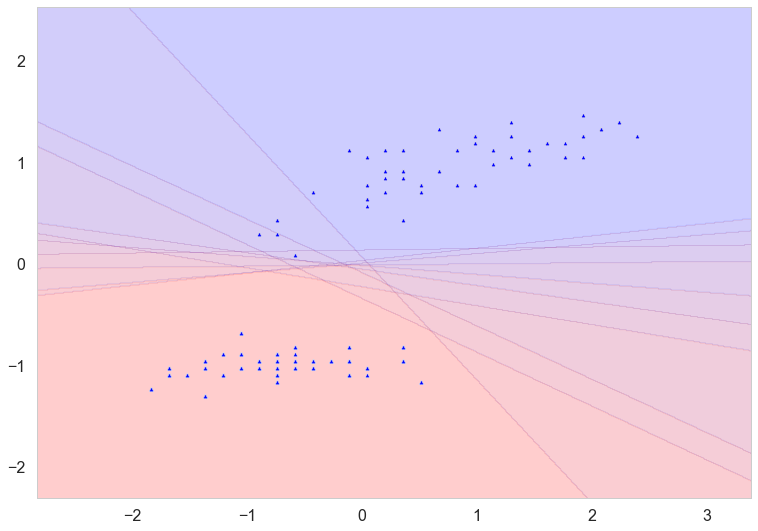

In [405]:
for i in np.arange(2,100,10):
    ada = AdalineSGD(n_iter=15,eta=0.1, random_state=1)
    ada.partial_fit(X_rand[:i,:], y_rand[:i])
    plot_decision_regions__(X_rand, y_rand, i, classifier=ada)

# what we can learn from playing with `partial_fit`
1. too small eta seems to make it actually stuck in local optima -> eta needs to be optimized
2. partial_fit does not shuffle so technically we should shuffle it outside of the class and feed it
3. however, the shuffling does not make much difference for this dataset
4. You can see decision boundary changes over samples